# Deep Learning Network 코딩 패턴

1. data set을 불러온다.
1. data preprocessing을 한다.
1. tf.data.Dataset을 구성한다. train / validation / test Dataset을 만든다.
1. network를 구성한다.
1. network compile을 한다. optimizer와 loss funciton은 필수로 설정하고 필요하다면 metrics도 설정한다.
1. network를 학습시킨다.
1. 최종 평가를 실시한다.

##### 필요한 것 import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# data 관련
from sklearn.model_selection import train_test_split

# network 관련
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers

import random

In [2]:
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

##### history를 받아서 plotting하는 함수 정의

In [3]:
def plot_result(hist, loss_min = None, loss_max = None):
    plt.figure(figsize = (15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(hist.epoch, hist.history['loss'], label = 'train Dataset')
    plt.plot(hist.epoch, hist.history['val_loss'], label = 'validation Dataset')
    plt.title('Loss 변화', fontsize = 13)
    if loss_min != None and loss_max != None:
        plt.ylim(loss_min, loss_max)   
    plt.xlabel('epoch', fontsize = 12)
    plt.ylabel('loss', fontsize = 12)
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(hist.epoch, hist.history['accuracy'], label = 'train Dataset')
    plt.plot(hist.epoch, hist.history['val_accuracy'], label = 'validation Dataset')
    plt.title('Accuracy 변화', fontsize = 13)
    plt.xlabel('epoch', fontsize = 12)
    plt.ylabel('accuracy', fontsize = 12)
    plt.legend()
    plt.grid()

    plt.show()

##### MNIST data set loading

In [4]:
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

In [5]:
train_image, val_image, train_label, val_label = train_test_split(train_image, train_label, 
                                                                  stratify = train_label, 
                                                                  test_size = 0.2,
                                                                  random_state = 0)

In [6]:
train_image.shape, val_image.shape, test_image.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [7]:
train_label.shape, val_label.shape, test_label.shape

((48000,), (12000,), (10000,))

##### data preprocessing
- X: feature scaling
- y: one-hot encoding

In [8]:
y_train = keras.utils.to_categorical(train_label)
y_val = keras.utils.to_categorical(val_label)
y_test = keras.utils.to_categorical(test_label)

X_train = train_image.astype('float32') / 255
X_val = val_image.astype('float32') / 255
X_test = test_image.astype('float32') / 255

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


##### Hyper Parameter 정의

In [9]:
LEARNING_RATE = 0.001
N_EPOCH = 20
N_BATCH = 1000

##### Dataset 생성

In [10]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(X_train.shape[0]).batch(N_BATCH, drop_remainder = True)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(N_BATCH)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCH)

In [11]:
print(len(train_dataset), len(val_dataset), len(test_dataset))

48 12 10


# network 성능 변경 방법 1.

### network 크기 변경에 따른 성능 변화 확인

##### 크기가 작은 network 생성

In [12]:
# 크기가 작은 network를 생성하는 함수를 정의한다.

In [13]:
def get_small_model():
    # Network 정의
    model = keras.Sequential()
    
    # Hidden Layer 생성
    model.add(layers.Flatten(input_shape = (28, 28)))
    
    # Ouput Layer 생성
    model.add(layers.Dense(10, activation = 'softmax', name = 'Output_Layer'))
    
    # Network Compile
    model.compile(optimizer = optimizers.Adam(learning_rate = LEARNING_RATE), 
                  loss = 'categorical_crossentropy', 
                  metrics = 'accuracy')
    
    return model

In [14]:
small_model = get_small_model()
small_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Output_Layer (Dense)        (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [15]:
hist = small_model.fit(train_dataset, epochs = N_EPOCH, validation_data = val_dataset)

Epoch 1/20
48/48 [==============================] - 1s 8ms/step - loss: 1.5569 - accuracy: 0.5961 - val_loss: 1.0101 - val_accuracy: 0.8063
Epoch 2/20
48/48 [==============================] - 0s 5ms/step - loss: 0.8298 - accuracy: 0.8296 - val_loss: 0.6855 - val_accuracy: 0.8526
Epoch 3/20
48/48 [==============================] - 0s 6ms/step - loss: 0.6278 - accuracy: 0.8578 - val_loss: 0.5599 - val_accuracy: 0.8689
Epoch 4/20
48/48 [==============================] - 0s 6ms/step - loss: 0.5350 - accuracy: 0.8714 - val_loss: 0.4916 - val_accuracy: 0.8808
Epoch 5/20
48/48 [==============================] - 0s 6ms/step - loss: 0.4802 - accuracy: 0.8815 - val_loss: 0.4483 - val_accuracy: 0.8887
Epoch 6/20
48/48 [==============================] - 0s 6ms/step - loss: 0.4435 - accuracy: 0.8880 - val_loss: 0.4176 - val_accuracy: 0.8957
Epoch 7/20
48/48 [==============================] - 0s 4ms/step - loss: 0.4170 - accuracy: 0.8924 - val_loss: 0.3952 - val_accuracy: 0.8997
Epoch 8/20
48/48 [==

##### visualization

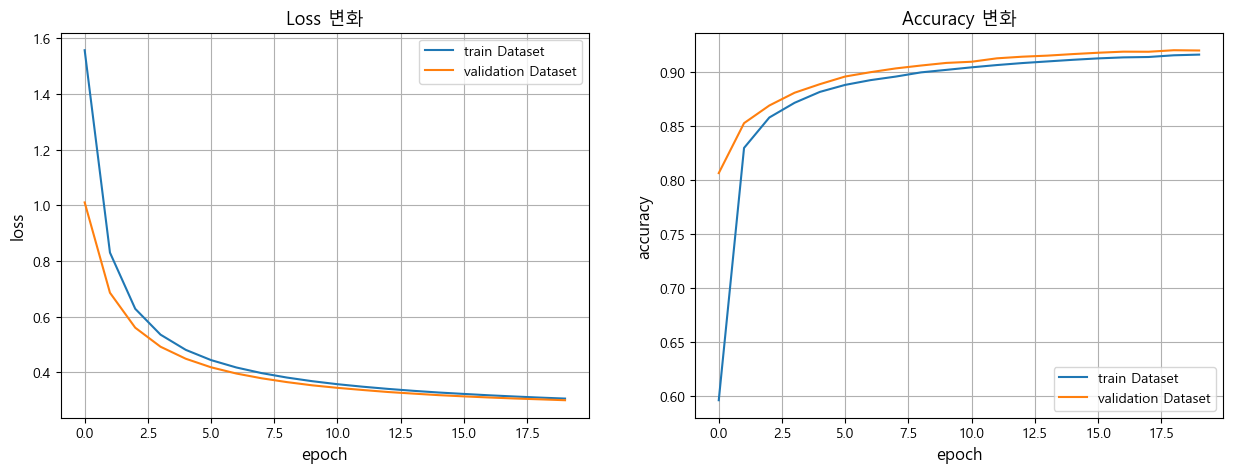

In [16]:
# 정의한 함수를 사용한다.
plot_result(hist)

In [17]:
# 실행 결과 학습이 덜 되었다는 것을 알 수 있다.

##### 최종 평가

In [18]:
print(small_model.evaluate(test_dataset))

10/10 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9179
[0.29477500915527344, 0.917900025844574]


##### 크기가 큰 network 생성

In [19]:
# 크기가 큰 network를 생성하는 함수를 정의한다.

In [20]:
def get_big_model():
    # Network 정의
    model = keras.Sequential()
    
    # Hidden Layer 생성
    model.add(layers.Flatten(input_shape = (28, 28)))
    model.add(layers.Dense(512, activation = 'relu'))
    model.add(layers.Dense(512, activation = 'relu'))
    model.add(layers.Dense(256, activation = 'relu'))
    model.add(layers.Dense(256, activation = 'relu'))
    model.add(layers.Dense(128, activation = 'relu'))
    model.add(layers.Dense(128, activation = 'relu'))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(64, activation = 'relu'))
    
    # Ouput Layer 생성
    model.add(layers.Dense(10, activation = 'softmax', name = 'Output_Layer'))
    
    # Network Compile
    model.compile(optimizer = optimizers.Adam(learning_rate = LEARNING_RATE), 
                  loss = 'categorical_crossentropy', 
                  metrics = 'accuracy')
    
    return model

In [21]:
big_model = get_big_model()
big_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 128)              

In [22]:
hist = big_model.fit(train_dataset, epochs = N_EPOCH, validation_data = val_dataset)

Epoch 1/20
48/48 [==============================] - 3s 33ms/step - loss: 0.7917 - accuracy: 0.7437 - val_loss: 0.2266 - val_accuracy: 0.9328
Epoch 2/20
48/48 [==============================] - 1s 28ms/step - loss: 0.1863 - accuracy: 0.9453 - val_loss: 0.1496 - val_accuracy: 0.9572
Epoch 3/20
48/48 [==============================] - 1s 29ms/step - loss: 0.1187 - accuracy: 0.9655 - val_loss: 0.1268 - val_accuracy: 0.9601
Epoch 4/20
48/48 [==============================] - 1s 29ms/step - loss: 0.0825 - accuracy: 0.9753 - val_loss: 0.1031 - val_accuracy: 0.9703
Epoch 5/20
48/48 [==============================] - 1s 28ms/step - loss: 0.0642 - accuracy: 0.9806 - val_loss: 0.0884 - val_accuracy: 0.9741
Epoch 6/20
48/48 [==============================] - 1s 29ms/step - loss: 0.0457 - accuracy: 0.9866 - val_loss: 0.1047 - val_accuracy: 0.9706
Epoch 7/20
48/48 [==============================] - 2s 30ms/step - loss: 0.0316 - accuracy: 0.9904 - val_loss: 0.0944 - val_accuracy: 0.9749
Epoch 8/20
48

##### visualization

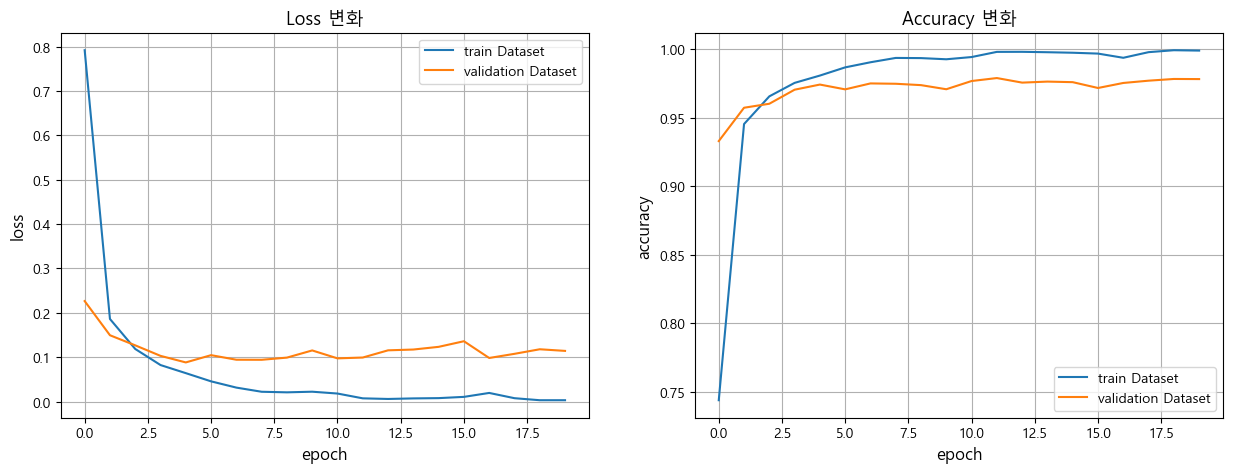

In [23]:
plot_result(hist)

In [24]:
# small_model과 비교했을 때 validation Dataset에 대한 성능이 안 좋아지고 있다는 것을 알 수 있다.
# network가 커질수록 무조건 좋은 것은 아니라는 것을 확인했다.

##### 최종 평가

In [25]:
print(big_model.evaluate(test_dataset))

10/10 [==============================] - 0s 11ms/step - loss: 0.1055 - accuracy: 0.9787
[0.1054610088467598, 0.9786999821662903]


In [26]:
# 최종 성능 평가 결과 small_model 보다는 big_model이 더 낫다는 것을 알 수 있다.

# small_model의 epoch 수를 늘려서 확인해보기

# network 성능 변경 방법 1.

### Dropout Layer 추가를 통한 overfitting 문제 해결

In [27]:
# dropout layer는 dropout을 설정하고자 하는 layer 앞에 위치시켜야 한다.

In [28]:
def get_dropout_model():
    # Network 정의
    model = keras.Sequential()
    
    # Hidden Layer 생성
    model.add(layers.Flatten(input_shape = (28, 28)))
    
    model.add(layers.Dropout(rate = 0.5))
    model.add(layers.Dense(512, activation = 'relu'))
    
    model.add(layers.Dropout(rate = 0.5))
    model.add(layers.Dense(512, activation = 'relu'))
    
    model.add(layers.Dropout(rate = 0.5))
    model.add(layers.Dense(256, activation = 'relu'))
    
    model.add(layers.Dropout(rate = 0.5))
    model.add(layers.Dense(256, activation = 'relu'))
    
    model.add(layers.Dropout(rate = 0.5))
    model.add(layers.Dense(128, activation = 'relu'))
    
    model.add(layers.Dropout(rate = 0.5))
    model.add(layers.Dense(128, activation = 'relu'))
    
    model.add(layers.Dropout(rate = 0.5))
    model.add(layers.Dense(64, activation = 'relu'))
    
    model.add(layers.Dropout(rate = 0.5))
    model.add(layers.Dense(64, activation = 'relu'))
    
    # Ouput Layer 생성
    model.add(layers.Dense(10, activation = 'softmax', name = 'Output_Layer'))
    
    # Network Compile
    model.compile(optimizer = optimizers.Adam(learning_rate = LEARNING_RATE), 
                  loss = 'categorical_crossentropy', 
                  metrics = 'accuracy')
    
    return model

In [29]:
dropout_model = get_dropout_model()
dropout_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)              

In [30]:
hist = dropout_model.fit(train_dataset, epochs = N_EPOCH, validation_data = val_dataset)

Epoch 1/20
48/48 [==============================] - 4s 49ms/step - loss: 2.3064 - accuracy: 0.1160 - val_loss: 2.2989 - val_accuracy: 0.1123
Epoch 2/20
48/48 [==============================] - 2s 44ms/step - loss: 2.1681 - accuracy: 0.2026 - val_loss: 2.1101 - val_accuracy: 0.2292
Epoch 3/20
48/48 [==============================] - 2s 46ms/step - loss: 1.9780 - accuracy: 0.2529 - val_loss: 2.0191 - val_accuracy: 0.2087
Epoch 4/20
48/48 [==============================] - 2s 46ms/step - loss: 1.7538 - accuracy: 0.3019 - val_loss: 1.6311 - val_accuracy: 0.3547
Epoch 5/20
48/48 [==============================] - 2s 46ms/step - loss: 1.4730 - accuracy: 0.3909 - val_loss: 1.2044 - val_accuracy: 0.4857
Epoch 6/20
48/48 [==============================] - 2s 47ms/step - loss: 1.2937 - accuracy: 0.4655 - val_loss: 1.0666 - val_accuracy: 0.5460
Epoch 7/20
48/48 [==============================] - 2s 46ms/step - loss: 1.1838 - accuracy: 0.5195 - val_loss: 0.9386 - val_accuracy: 0.6305
Epoch 8/20
48

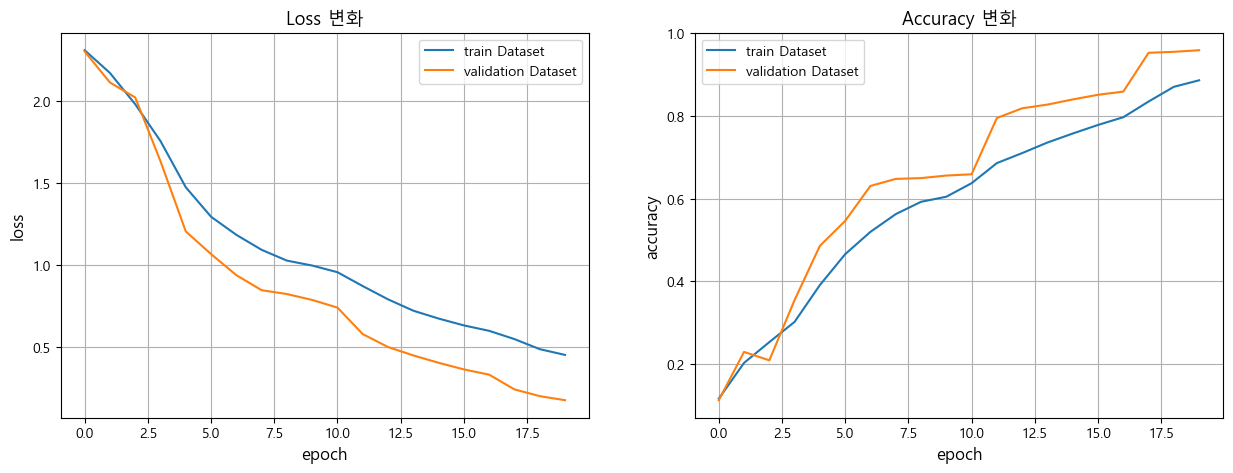

In [31]:
plot_result(hist)

In [ ]:
# 실행 결과 학습이 진행되다가 멈추었다는 것을 확인할 수 있다.
# 그래서 Dropout Layer가 추가된 network를 생성하고 학습시킬 때는 epoch의 수를 여유있게 주는 것이 좋다.